In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
sns.set_theme(style="whitegrid")

## 1. Load Data

We load the raw data from `data/raw/uc_diagnostic_tests.csv`. Note that the data uses commas as decimal separators.

In [2]:
data_path = '../data/raw/uc_diagnostic_tests.csv'
df = pd.read_csv(data_path, decimal=',')
df.head()

,mayo,plec,Wiek,witD,alat,albumina,APTT,ASPAT,Bialko calkowite,BILIRUBINA CAŁKOWITA,...,Morfologia RDW-CV,Morfologia RDW-SD,OB,PT (CZAS PROTROMBINOWY) INR,Potas,Sód,"TIBC,",UIBC,TRANSFERYNA,TRÓJGLICERYDY
0,2,0,36,45.93,9.0,NaN,22.290,17.0,6.3,0.4,...,95.0,NaN,NaN,0.888,4.88,139.0,NaN,NaN,NaN,NaN
1,0,1,69,27.70,13.0,NaN,28.200,15.0,7.2,0.5,...,73.2,NaN,NaN,1.100,4.13,141.0,NaN,379.0,NaN,NaN
2,3,1,41,48.80,28.0,NaN,32.300,23.0,6.8,0.4,...,85.6,NaN,NaN,1.000,4.34,141.0,353.0,242.0,NaN,118.0
3,1,1,31,28.30,38.0,NaN,34.900,42.0,7.2,0.6,...,66.3,NaN,NaN,1.120,4.75,139.0,NaN,NaN,NaN,75.0
4,2,0,40,27.80,14.0,3.4,20.467,16.0,6.2,0.3,...,72.5,NaN,NaN,0.965,4.66,139.0,NaN,294.0,NaN,NaN


## 2. Dataset Overview

In [3]:
print(f"Dataset shape: {df.shape}")
df.info()

Dataset shape: (252, 56)
<class 'pandas.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   mayo                         252 non-null    int64  
 1   plec                         252 non-null    int64  
 2   Wiek                         252 non-null    int64  
 3   witD                         153 non-null    float64
 4   alat                         236 non-null    float64
 5   albumina                     119 non-null    float64
 6   APTT                         219 non-null    float64
 7   ASPAT                        235 non-null    float64
 8   Bialko calkowite             196 non-null    float64
 9   BILIRUBINA CAŁKOWITA         224 non-null    float64
 10  CHOLESTEROL CAŁKOWITY        195 non-null    float64
 11  CHOLESTEROL HDL              179 non-null    float64
 12  CRP ULTRACZUŁE               238 non-null    float64
 13  CHOLES

/var/folders/h0/00jxjppn1yd6zq_bs8qqb9tw0000gn/T/ipykernel_4923/378629751.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='mayo', palette='viridis')


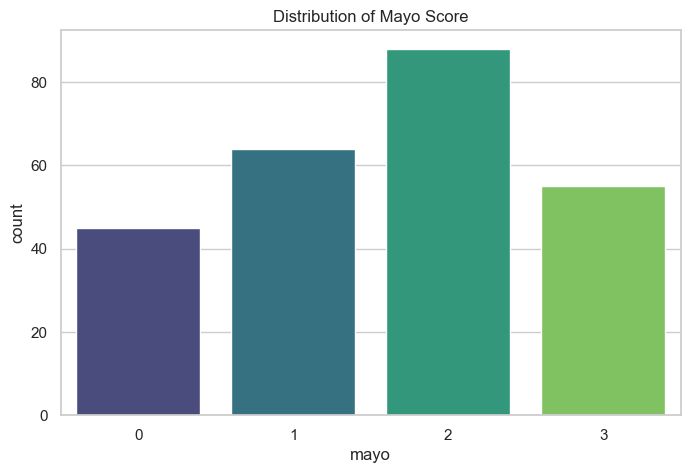

In [4]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='mayo', palette='viridis')
plt.title('Distribution of Mayo Score')
plt.show()

## 4. Missing Values Analysis

/var/folders/h0/00jxjppn1yd6zq_bs8qqb9tw0000gn/T/ipykernel_4923/3917679842.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_df['Percentage'][:30], y=missing_df.index[:30], palette='magma')


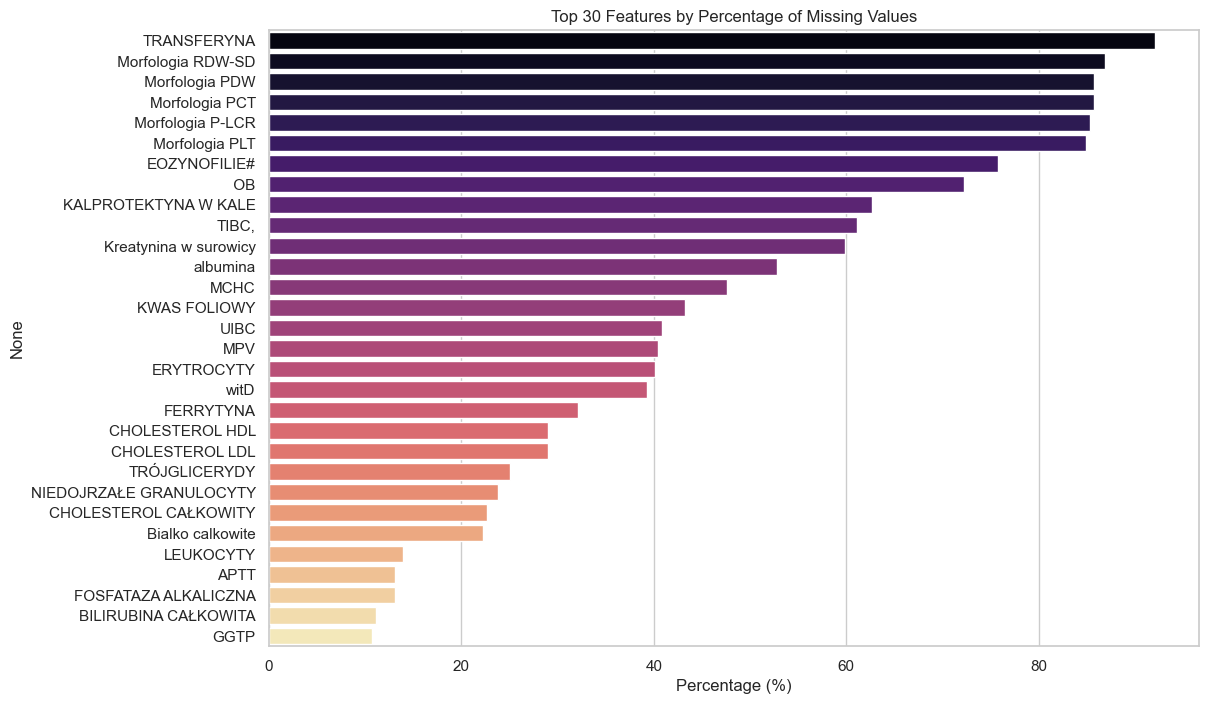

In [5]:
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

if not missing_df.empty:
    plt.figure(figsize=(12, 8))
    sns.barplot(x=missing_df['Percentage'][:30], y=missing_df.index[:30], palette='magma')
    plt.title('Top 30 Features by Percentage of Missing Values')
    plt.xlabel('Percentage (%)')
    plt.show()
else:
    print("No missing values found.")

## 5. Numerical Feature Distributions

Visualizing distributions of some key features.

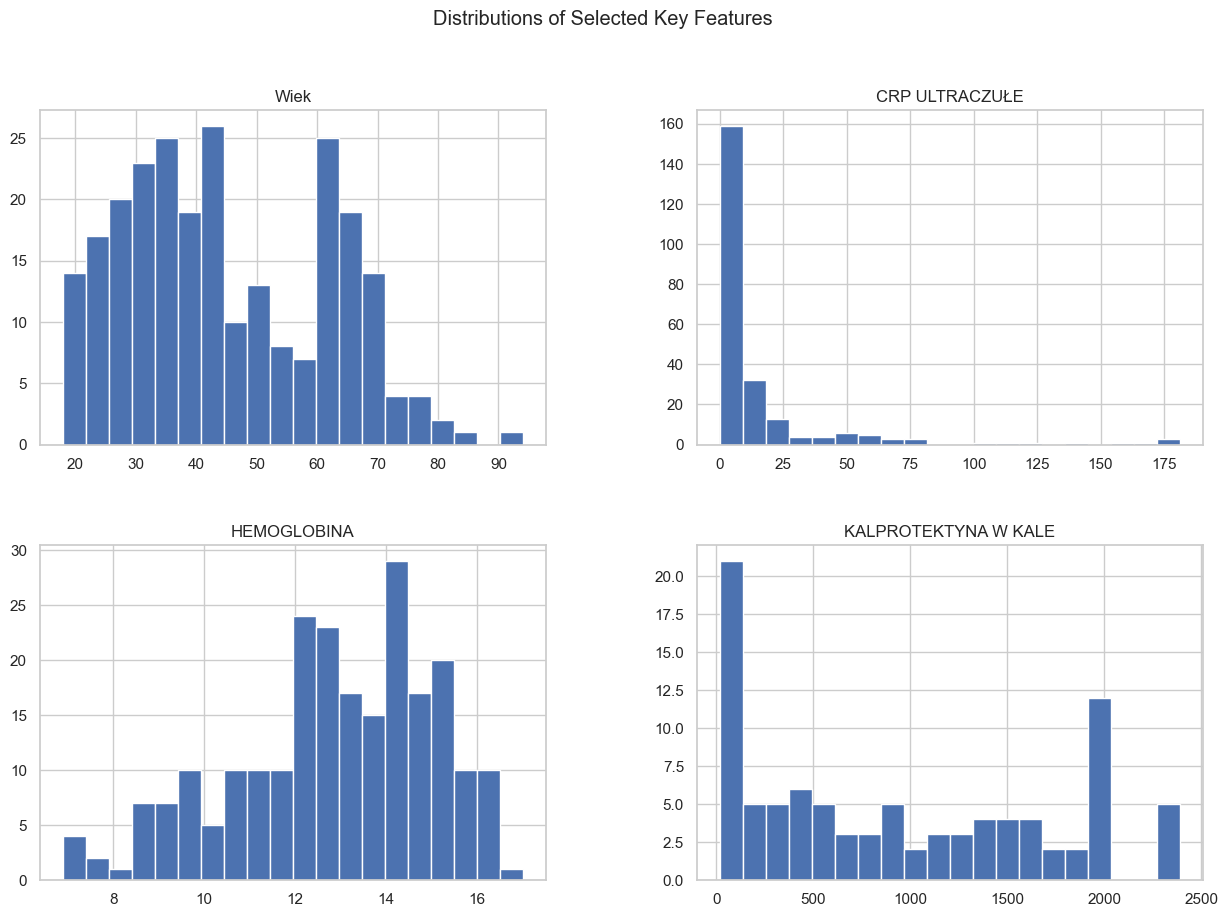

In [6]:
key_features = ['Wiek', 'CRP ULTRACZUŁE', 'HEMOGLOBINA', 'KALPROTEKTYNA W KALE']
existing_key_features = [f for f in key_features if f in df.columns]

df[existing_key_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distributions of Selected Key Features')
plt.show()

## 6. Correlation Analysis

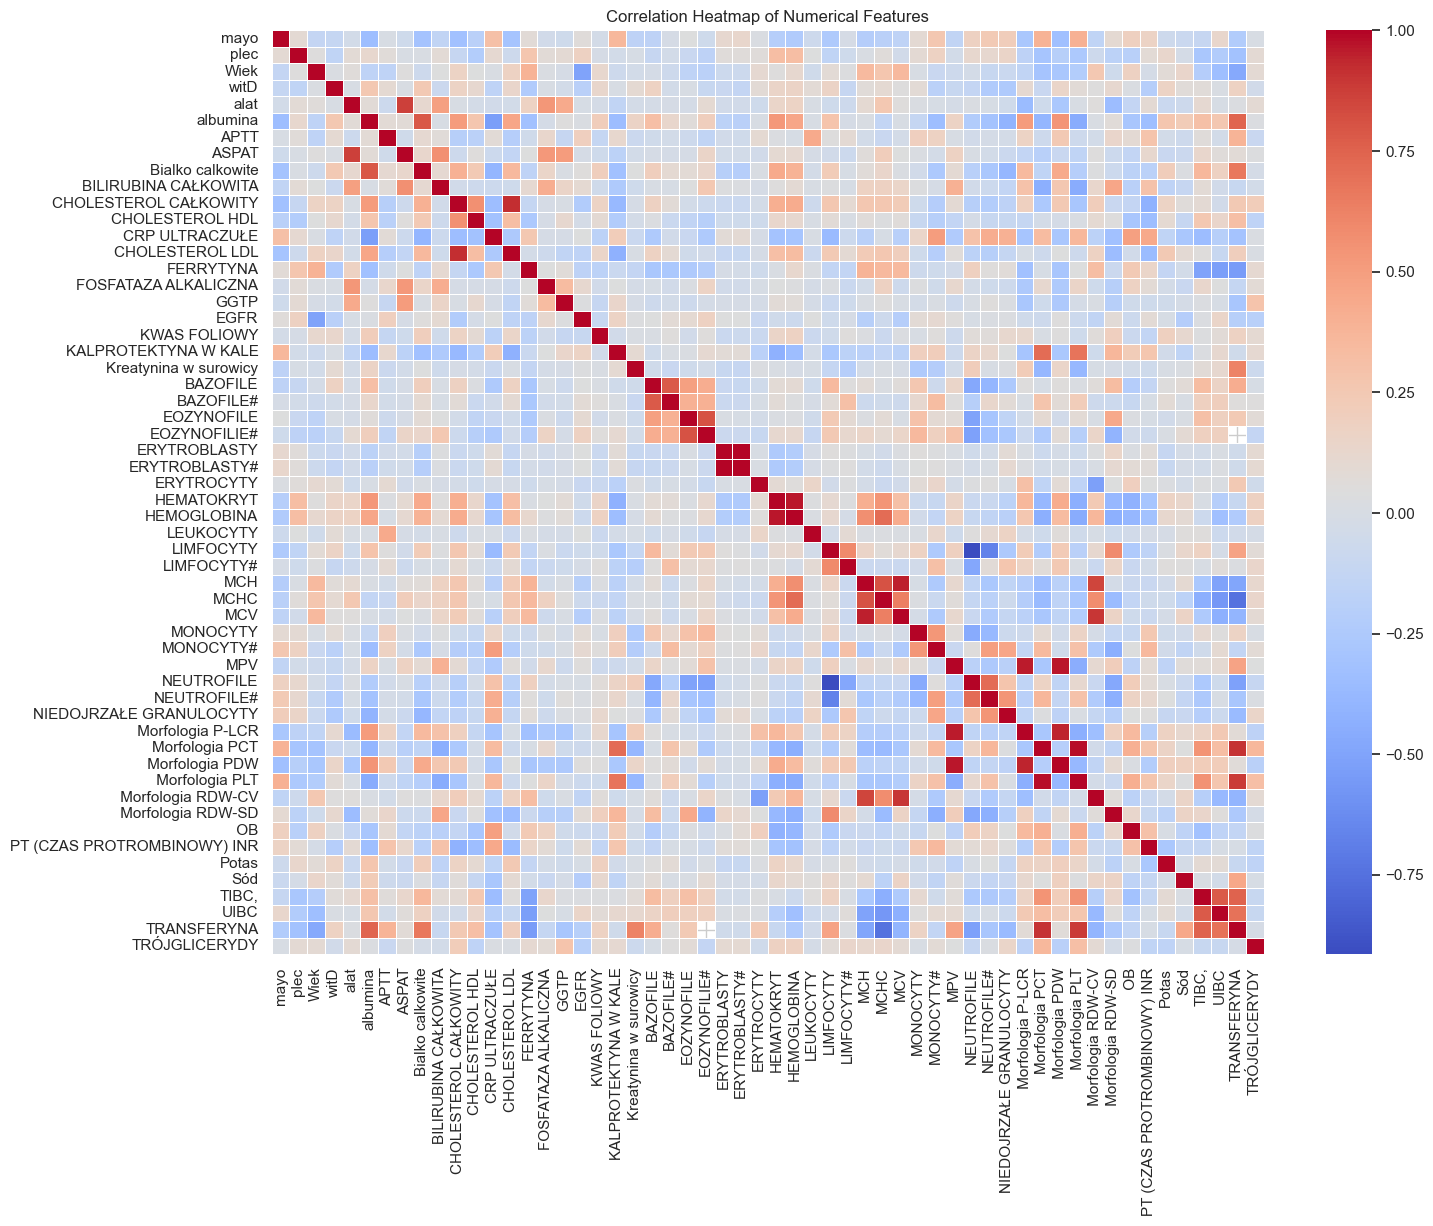

In [7]:
plt.figure(figsize=(16, 12))
# Select only numerical columns for correlation
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()